In [2]:
%%javascript
 
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('up');
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('down')

<IPython.core.display.Javascript object>

# Importing all necessary libraries 

In [3]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [4]:

#import needed libraries & float format definition


import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

# Reading Weather Hour data 

In [ ]:
##Read  weather hour  DATA 
import os
import pandas as pd
os.chdir("/nfsroot/data/home/2389B49/End_of_course/Weatherdatatoconsider-1550046361974/2005_2004_hourly")
weather_hour_data = pd.concat([pd.read_table(f , sep=",", encoding='unicode_escape',

                      na_values="'', '?', '#'")

                                 for f in os.listdir("/nfsroot/data/home/2389B49/End_of_course/Weatherdatatoconsider-1550046361974/2005_2004_hourly")], \
                             ignore_index = True)

# Reading Weather Hour_hpd data 

In [ ]:
import os
import pandas as pd
os.chdir("/nfsroot/data/home/2389B49/End_of_course/Weatherdatatoconsider-1550046361974/2004_2005_hdp")
#Read  weather HPD DATA 
weatherhpd_data = pd.concat([pd.read_table(f , sep=",", encoding='unicode_escape',

                      na_values="'', '?', '#'")

                                 for f in os.listdir("/nfsroot/data/home/2389B49/End_of_course/Weatherdatatoconsider-1550046361974/2004_2005_hdp")], \
                             ignore_index = True)

# Reading Flight train data

In [ ]:
#data = pd.read_csv("")
Flight_train = pd.read_csv("file:////home/2389B49/End_of_course/FlightDelay_Train.csv")

In [ ]:
Flight_train.head(5)

In [287]:
Flight_train.dtypes

FlightNumber              object
Year                       int64
Month                      int64
DayofMonth                 int64
DayOfWeek                  int64
ScheduledDepTime           int64
ScheduledArrTime           int64
ScheduledTravelTime        int64
Origin                    object
Destination               object
Distance                   int64
ActualArrivalTimeStamp    object
dtype: object

# Reading All_Stations data

In [288]:
#Read all stations data 
AllStationsData_PHD = pd.read_csv("file:///home/2389B49/End_of_course/Weatherdatatoconsider-1550046361974/AllStationsData_PHD.txt",delimiter = "|")

In [289]:
weather_hour_data.head(2)

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30,7,38,0,000,0,30
1,3035,20040101,10,SCT110,10SM,43,18,37,0,000,0,30


In [290]:
weather_hour_data.shape

(11516906, 12)

In [291]:
weatherhpd_data.head(3)

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,3034,20040101,10,0
1,3035,20040101,10,0
2,3039,20040101,10,0


In [292]:
weatherhpd_data.shape

(12107407, 4)

In [293]:
Flight_train.head(2)

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55


In [294]:
Flight_train.shape

(7861, 12)

In [295]:
AllStationsData_PHD.head(2)

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,38,-108,+7
1,3012,SKX,0,0,0,36,-105,+7


In [296]:
AllStationsData_PHD.shape

(1744, 8)

## Merging  hourly and hpd data into one data frame,with condition  merge on 'WeatherStationID','YearMonthDay','Time' 

In [298]:
weather_hour_hpd = pd.merge(weather_hour_data,weatherhpd_data ,how='left', left_on=['WeatherStationID','YearMonthDay','Time'], right_on = ['WeatherStationID','YearMonthDay','Time'])

# Merging weather and all station data into one data frame,with condition merge on 'WeatherStationID'

In [300]:
station_weather_hour_hpd= pd.merge(AllStationsData_PHD,weather_hour_hpd,how="left",left_on=["WeatherStationID"],right_on=["WeatherStationID"])

In [301]:
station_weather_hour_hpd.head(5)

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip
0,3011,TEX,0,0,0,38,-108,+7,20040101,1350,FEW075 BKN090,10SM,32,10,40,15,160,0,30,0
1,3011,TEX,0,0,0,38,-108,+7,20040101,1910,BKN028 OVC033,10SM,21,14,74,5,VRB,0,30,0
2,3011,TEX,0,0,0,38,-108,+7,20040101,2010,FEW025 OVC032,9SM,25,18,75,4,VRB,0,30,0
3,3011,TEX,0,0,0,38,-108,+7,20040102,1010,SCT015 BKN020 OVC028,4SM,25,23,92,0,000,0,30,0
4,3011,TEX,0,0,0,38,-108,+7,20040102,1050,BKN013 OVC021,1.75SM,27,23,85,0,000,0,30,0


In [302]:
station_weather_hour_hpd.dtypes

WeatherStationID             int64
AirportID                   object
GroundHeight                 int64
StationHeight                int64
BarometerHeight              int64
Latitude                   float64
Longitude                  float64
TimeZone                    object
YearMonthDay                object
Time                       float64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
HourlyPrecip               float64
dtype: object

# Add new 'day' column and remove old column

In [303]:

Flight_train["Day"]=Flight_train["DayofMonth"]
Flight_train = Flight_train.drop(["DayofMonth"],axis=1)

In [304]:
# Creating new column by adding year,month and day
Flight_train["Date"]=pd.to_datetime(Flight_train[["Year","Month","Day"]])

In [305]:
# Filling Missing value 
station_weather_hour_hpd.YearMonthDay[10590609] = "20040515"

In [306]:
#Converting the  YearMonthDay to date format
station_weather_hour_hpd['Date'] =  pd.to_datetime(station_weather_hour_hpd['YearMonthDay'], format='%Y%m%d')

In [307]:
#converting date to string
station_weather_hour_hpd['Date']= station_weather_hour_hpd.Date.astype(str)
Flight_train['Date']= Flight_train.Date.astype(str)

In [308]:
#Extracting hours from time 

station_weather_hour_hpd["Time"] = station_weather_hour_hpd["Time"].astype(str)
station_weather_hour_hpd.Time= pd.to_numeric(station_weather_hour_hpd.Time, errors='coerce')
#station_weather_hour_hpd['hours'] =station_weather_hour_hpd.Time.fillna(9999).astype(int)
station_weather_hour_hpd['hours']= station_weather_hour_hpd['hours'].astype(str)

In [309]:
# Making adjustments in time  to fit exactly into 4 digits(HHMM) and extracting hoursv
length = 3
fill = '0'
station_weather_hour_hpd['hours'] = station_weather_hour_hpd["hours"].str.ljust(length,fill)
station_weather_hour_hpd['hours'] = station_weather_hour_hpd["hours"].str.rjust(4,"0")
station_weather_hour_hpd["Hours"] = station_weather_hour_hpd["hours"].str[:2]

In [310]:
# Extracting hours from ScheduledDepTime in Flight data
Flight_train.Time= pd.to_numeric(Flight_train.ScheduledDepTime, errors='coerce')
#Flight_train['hours'] =Flight_train.Time.fillna(9999).astype(int)
Flight_train['hours']= Flight_train['hours'].astype(str)
Flight_train['hours']= Flight_train['hours'].astype(str)

In [311]:
# Making adjustments in time  to fit exactly into 4 digits(HHMM) and extracting hours
length = 3
fill = '0'
Flight_train['hours']= Flight_train["hours"].str.ljust(length,fill)
Flight_train['hours'] = Flight_train["hours"].str.rjust(4,"0")
Flight_train["Hours"] = Flight_train["hours"].str[:2]

# Merging station_weather_hour_hpd with flight train on "Destination","Date","Hours(ScheduledDepTime)"

In [313]:
Final_Flight_train = pd.merge(Flight_train,station_weather_hour_hpd,how="left",left_on=["Origin","Date","Hours"],right_on=["AirportID","Date","Hours"])

In [314]:
print(Final_Flight_train.shape)

(10289, 36)


# Duplicate rows got  added while merging ,Dropping them  with respect to Flight_number, keeping only last records in dupilcates. 

In [315]:
Final_train=Final_Flight_train.drop_duplicates(subset='FlightNumber',keep='last')

In [316]:
Final_train.shape

(7861, 36)

In [317]:
# Extracting hours from ScheduledArrTime in Flight data

Final_train.Time= pd.to_numeric(Final_train.ScheduledArrTime, errors='coerce')
#Final_train['Ahours'] =Final_train.Time.fillna(9999).astype(int)
Final_train['Ahours']= Final_train['Ahours'].astype(str)
Final_train['Ahours']= Final_train['Ahours'].astype(str)

#Fitting time as per the format
length = 3
fill = '0'
Final_train['Ahours']= Final_train["Ahours"].str.ljust(length,fill)
Final_train['Ahours'] = Final_train["Ahours"].str.rjust(4,"0")
Final_train["AHours"] = Final_train["Ahours"].str[:2]

In [318]:
# keeping a copy of dataframe to make any necessary corrections
station_weather_hour_hpd1=station_weather_hour_hpd.copy()

In [319]:
station_weather_hour_hpd.head(2)

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,YearMonthDay,Time,...,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,Date,hours,Hours
0,3011,TEX,0,0,0,38,-108,+7,20040101,1350,...,10,40,15,160,0,30,0,2004-01-01,1350,13
1,3011,TEX,0,0,0,38,-108,+7,20040101,1910,...,14,74,5,VRB,0,30,0,2004-01-01,1910,19


In [320]:
#Renaming column names , so while merging again wiht respect to Destination, date and Schedule arrival tine , date won't be override

station_weather_hour_hpd1.columns=['WeatherStationID1','AirportID1','GroundHeight1','StationHeight1','BarometerHeight1','Latitude1','Longitude1','TimeZone1','YearMonthDay1','Time1','SkyConditions1','Visibility1','DBT1','DewPointTemp1','RelativeHumidityPercent1','WindSpeed1','WindDirection1','WindGustValue1','StationPressure1','HourlyPrecip1','Date1','hours1','Hours1']

In [321]:
# merging with respect to Schedule Arrival time, Destination and Date.
Final_train_a = pd.merge(Final_train,station_weather_hour_hpd1,how="left",left_on=["Destination","Date","AHours"],right_on=["AirportID1","Date1","Hours1"])

In [322]:
Final_train_a.shape

(9426, 61)

In [323]:
Final_train_a.head(2)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,DewPointTemp1,RelativeHumidityPercent1,WindSpeed1,WindDirection1,WindGustValue1,StationPressure1,HourlyPrecip1,Date1,hours1,Hours1
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,...,35,27,8,190,0,29,0,2004-09-20,1151,11
1,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,nan,nan,5,160,0,nan,nan,2004-11-19,1636,16


In [324]:
# After merging the date is repeated for some rows , through drop_duplicates removing redandant rows.
final_train_b=Final_train_a.drop_duplicates(subset='FlightNumber',keep='last')

In [325]:
final_train_b.shape

(7861, 61)

In [326]:
#Reading Test data
Flight_test = pd.read_csv("file:////home/2389B49/End_of_course/FlightDelay_Test/FlightDelay_Test.csv")

In [327]:
Flight_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278
2,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,239
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515
4,SBP_LAX_68158,2005,7,5,2,630,733,63,SBP,LAX,155


In [328]:
Flight_test["Day"]=Flight_test["DayofMonth"]
Flight_test = Flight_test.drop(["DayofMonth"],axis=1)

In [329]:
Flight_test["Date"]=pd.to_datetime(Flight_test[["Year","Month","Day"]])

In [330]:
# Extracting hours from ScheduledDepTime in test data
Flight_test['Date']= Flight_test.Date.astype(str)
Flight_test.Time= pd.to_numeric(Flight_test.ScheduledDepTime, errors='coerce')
#Flight_test['hours'] =Flight_test.Time.fillna(9999).astype(int)
Flight_test['hours']= Flight_test['hours'].astype(str)

In [331]:
# making adjustments so the hours format should be hh from hhmm 
length = 3
fill = '0'
Flight_test['hours']= Flight_test["hours"].str.ljust(length,fill)
Flight_test['hours'] = Flight_test["hours"].str.rjust(4,"0")
Flight_test["Hours"] = Flight_test["hours"].str[:2]

In [332]:
Flight_test.head(2)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,Day,Date,hours,Hours
0,DEN_XNA_62349,2005,9,1,1516,1756,100,DEN,XNA,616,12,2005-09-12,1516,15
1,RIC_EWR_87213,2005,11,1,1300,1415,75,RIC,EWR,278,14,2005-11-14,1300,13


In [333]:
Flight_test.shape

(6566, 14)

In [334]:
station_weather_hour_hpd .head(2)

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,YearMonthDay,Time,...,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,HourlyPrecip,Date,hours,Hours
0,3011,TEX,0,0,0,38,-108,+7,20040101,1350,...,10,40,15,160,0,30,0,2004-01-01,1350,13
1,3011,TEX,0,0,0,38,-108,+7,20040101,1910,...,14,74,5,VRB,0,30,0,2004-01-01,1910,19


In [335]:

# Merging with respect to schedule departure time , date and origin 
Final_Fight_test = pd.merge(Flight_test,station_weather_hour_hpd,how="left",left_on=["Origin","Date","Hours"],right_on=["AirportID","Date","Hours"])

In [336]:
Final_Fight_test.shape

(8405, 35)

In [337]:
Final_Fight_test_a=Final_Fight_test.drop_duplicates(subset='FlightNumber',keep='last')

In [338]:
Final_Fight_test_a.shape

(6566, 35)

In [339]:
# Extracting hours from ScheduledArrTime

Final_Fight_test_a.Time= pd.to_numeric(Final_Fight_test_a.ScheduledArrTime, errors='coerce')
#Final_Fight_test_a['Ahours'] =Final_Fight_test_a.Time.fillna(9999).astype(int)
Final_Fight_test_a['Ahours']= Final_Fight_test_a['Ahours'].astype(str)
Final_Fight_test_a['Ahours']= Final_Fight_test_a['Ahours'].astype(str)


length = 3
fill = '0'
Final_Fight_test_a['Ahours']= Final_Fight_test_a["Ahours"].str.ljust(length,fill)
Final_Fight_test_a['Ahours'] = Final_Fight_test_a["Ahours"].str.rjust(4,"0")
Final_Fight_test_a["AHours"] = Final_Fight_test_a["Ahours"].str[:2]

In [340]:
#Merging now with respect to Schedule Arrivaal time 
Final_Fight_test_b= pd.merge(Final_Fight_test_a ,station_weather_hour_hpd1 ,how="left",left_on=["Destination","Date","AHours"],right_on=["AirportID1","Date1","Hours1"])

In [341]:
Final_Fight_test_b.shape

(7642, 60)

In [342]:
Final_Fight_test_c=Final_Fight_test_b.drop_duplicates(subset='FlightNumber',keep='last')

In [343]:
Final_Fight_test_c.columns

Index([            u'FlightNumber',                     u'Year',
                          u'Month',                u'DayOfWeek',
               u'ScheduledDepTime',         u'ScheduledArrTime',
            u'ScheduledTravelTime',                   u'Origin',
                    u'Destination',                 u'Distance',
                            u'Day',                     u'Date',
                        u'hours_x',                    u'Hours',
               u'WeatherStationID',                u'AirportID',
                   u'GroundHeight',            u'StationHeight',
                u'BarometerHeight',                 u'Latitude',
                      u'Longitude',                 u'TimeZone',
                   u'YearMonthDay',                     u'Time',
                  u'SkyConditions',               u'Visibility',
                            u'DBT',             u'DewPointTemp',
        u'RelativeHumidityPercent',                u'WindSpeed',
                  u'WindD

In [344]:
final_train_b .columns


Index([            u'FlightNumber',                     u'Year',
                          u'Month',                u'DayOfWeek',
               u'ScheduledDepTime',         u'ScheduledArrTime',
            u'ScheduledTravelTime',                   u'Origin',
                    u'Destination',                 u'Distance',
         u'ActualArrivalTimeStamp',                      u'Day',
                           u'Date',                  u'hours_x',
                          u'Hours',         u'WeatherStationID',
                      u'AirportID',             u'GroundHeight',
                  u'StationHeight',          u'BarometerHeight',
                       u'Latitude',                u'Longitude',
                       u'TimeZone',             u'YearMonthDay',
                           u'Time',            u'SkyConditions',
                     u'Visibility',                      u'DBT',
                   u'DewPointTemp',  u'RelativeHumidityPercent',
                      u'W

In [345]:
Final_train_c=final_train_b.copy()

In [346]:
Final_Fight_test_delay=Final_Fight_test_c .copy()

In [347]:
Final_Fight_test_delay.shape

(6566, 60)

In [348]:
Final_train_c.shape

(7861, 61)

In [349]:
# Creating target(Flight delay) from ActualArrival timestamp and Schedule arrial timestamp

import datetime as dt
Final_train_c["new_date"] = Final_train_c["Day"].map(str)+"-"+Final_train_c["Month"].map(str)+"-"+Final_train_c["Year"].map(str)
Final_train_c['Scheduled_arrival']=pd.to_datetime(Final_train_c['ScheduledArrTime'],format='%H%M').dt.strftime('%H:%M')
Final_train_c["Actual_ArrivalTime"] = Final_train_c["new_date"] +" " + Final_train_c["Scheduled_arrival"]
Final_train_c['ActualArrivalTimeStamp']=Final_train_c['ActualArrivalTimeStamp'].str.replace("/","-")
Final_train_c['ActualArrivalTimeStamp']=pd.to_datetime(Final_train_c['ActualArrivalTimeStamp'])
Final_train_c['Actual_ArrivalTime']=pd.to_datetime(Final_train_c['Actual_ArrivalTime'])


Final_train_c['ActualArrivalTimeStamp2']=[d.date() for d in Final_train_c['ActualArrivalTimeStamp']]
Final_train_c['Actual_ArrivalTime2']=[d.date() for d in Final_train_c['Actual_ArrivalTime']]

In [350]:
Final_train_c["FlightDelay2"] = Final_train_c["ActualArrivalTimeStamp2"] - Final_train_c["Actual_ArrivalTime2"]
Final_train_c.head(1)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,HourlyPrecip1,Date1,hours1,Hours1,new_date,Scheduled_arrival,Actual_ArrivalTime,ActualArrivalTimeStamp2,Actual_ArrivalTime2,FlightDelay2
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,...,0,2004-09-20,1151,11,20-9-2004,11:54,2004-09-20 11:54:00,2004-09-20,2004-09-20,0 days


In [351]:
Final_train_c.FlightDelay2.value_counts()

0 days    7856
1 days       5
Name: FlightDelay2, dtype: int64

In [352]:
Final_train_c=Final_train_c.drop(Final_train_c[Final_train_c.FlightDelay2 == '1 days'].index)

In [353]:
Final_train_c.FlightDelay2.value_counts()

0 days    7856
Name: FlightDelay2, dtype: int64

In [354]:
Final_train_c["FlightDelay"] = Final_train_c["ActualArrivalTimeStamp"] - Final_train_c["Actual_ArrivalTime"]
Final_train_c['FlightDelay']=pd.to_datetime(Final_train_c['FlightDelay'])
Final_train_c['FlightDelay']=pd.to_datetime(Final_train_c['FlightDelay'],format='%H%M').dt.strftime('%H:%M')
Final_train_c.head(5)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,Date1,hours1,Hours1,new_date,Scheduled_arrival,Actual_ArrivalTime,ActualArrivalTimeStamp2,Actual_ArrivalTime2,FlightDelay2,FlightDelay
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,...,2004-09-20,1151,11,20-9-2004,11:54,2004-09-20 11:54:00,2004-09-20,2004-09-20,0 days,00:00
4,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,2004-11-19,1658,16,19-11-2004,16:34,2004-11-19 16:34:00,2004-11-19,2004-11-19,0 days,02:21
5,SNA_LAS_44378,2004,5,2,1800,1902,62,SNA,LAS,226,...,2004-05-04,1956,19,4-5-2004,19:02,2004-04-05 19:02:00,2004-04-05,2004-04-05,0 days,00:00
7,CLT_TPA_51502,2004,7,2,1400,1533,93,CLT,TPA,508,...,2004-07-06,1553,15,6-7-2004,15:33,2004-06-07 15:33:00,2004-06-07,2004-06-07,0 days,00:00
8,MSP_ORD_44884,2004,9,4,830,946,76,MSP,ORD,334,...,2004-09-23,0956,09,23-9-2004,09:46,2004-09-23 09:46:00,2004-09-23,2004-09-23,0 days,00:00


In [355]:
# Converting target to exact format like if delay :1 , else 2
Final_train_c['FlightDelay']=Final_train_c['FlightDelay'].str.replace(":","")
Final_train_c['FlightDelay']=Final_train_c['FlightDelay'].astype('int64')
Final_train_c['FlightDelay']=Final_train_c['FlightDelay'].apply(lambda x: '1' if x>= 15 else '2')

In [356]:
Final_train_c.head(2)

,FlightNumber,Year,Month,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,Date1,hours1,Hours1,new_date,Scheduled_arrival,Actual_ArrivalTime,ActualArrivalTimeStamp2,Actual_ArrivalTime2,FlightDelay2,FlightDelay
0,BOS_CLE_29089,2004,9,1,1000,1154,114,BOS,CLE,563,...,2004-09-20,1151,11,20-9-2004,11:54,2004-09-20 11:54:00,2004-09-20,2004-09-20,0 days,2
4,CLE_ATL_44346,2004,11,5,1440,1634,114,CLE,ATL,554,...,2004-11-19,1658,16,19-11-2004,16:34,2004-11-19 16:34:00,2004-11-19,2004-11-19,0 days,1


In [357]:
Final_train_c.FlightDelay.value_counts()

2    6342
1    1514
Name: FlightDelay, dtype: int64

In [358]:
Final_train_c.shape

(7856, 68)

In [359]:
Final_train_c.columns

Index([            u'FlightNumber',                     u'Year',
                          u'Month',                u'DayOfWeek',
               u'ScheduledDepTime',         u'ScheduledArrTime',
            u'ScheduledTravelTime',                   u'Origin',
                    u'Destination',                 u'Distance',
         u'ActualArrivalTimeStamp',                      u'Day',
                           u'Date',                  u'hours_x',
                          u'Hours',         u'WeatherStationID',
                      u'AirportID',             u'GroundHeight',
                  u'StationHeight',          u'BarometerHeight',
                       u'Latitude',                u'Longitude',
                       u'TimeZone',             u'YearMonthDay',
                           u'Time',            u'SkyConditions',
                     u'Visibility',                      u'DBT',
                   u'DewPointTemp',  u'RelativeHumidityPercent',
                      u'W

In [360]:
#Taking unneccesary columns to drop 
val1=['FlightNumber','Year','Month','DayOfWeek','ScheduledDepTime','ScheduledArrTime','ActualArrivalTimeStamp','Day','Date','hours_x','Hours','WeatherStationID','AirportID','Latitude','Longitude','TimeZone','YearMonthDay','Time','hours_y','Ahours','AHours','WeatherStationID1','AirportID1','Latitude1','Longitude1','TimeZone1','YearMonthDay1','Time1','Date1','hours1','Hours1','new_date','Scheduled_arrival','Actual_ArrivalTime','ActualArrivalTimeStamp2','Actual_ArrivalTime2','FlightDelay2']

In [361]:
Final_train_delay=Final_train_c.drop(val1,axis=1)

In [362]:
Final_train_delay.shape

(7856, 31)

In [363]:
Final_train_delay.head(2)

,ScheduledTravelTime,Origin,Destination,Distance,GroundHeight,StationHeight,BarometerHeight,SkyConditions,Visibility,DBT,...,Visibility1,DBT1,DewPointTemp1,RelativeHumidityPercent1,WindSpeed1,WindDirection1,WindGustValue1,StationPressure1,HourlyPrecip1,FlightDelay
0,114,BOS,CLE,563,19,30,180,CLR,10SM,63,...,10SM,71,35,27,8,190,0,29,0,2
4,114,CLE,ATL,554,802,805,805,OVC022,6SM,53,...,2SM,nan,nan,nan,9,150,0,nan,nan,1


In [364]:
# Calculating speed from Distance and ScheduledTravelTime
Final_train_delay["SPEED"] = Final_train_delay["Distance"] / Final_train_delay["ScheduledTravelTime"]

In [365]:
Final_Fight_test_delay["SPEED"] = Final_Fight_test_delay["Distance"] / Final_Fight_test_delay["ScheduledTravelTime"]


In [366]:
D=Final_train_delay.T
D

,0,4,5,7,8,9,10,11,12,13,...,9415,9416,9417,9418,9419,9421,9422,9423,9424,9425
ScheduledTravelTime,114,114,62,93,76,62,107,63,120,156,...,85,80,352,165,66,145,179,75,104,168
Origin,BOS,CLE,SNA,CLT,MSP,CVG,DFW,ACV,BHM,DFW,...,LEX,ORD,JFK,EWR,ATL,IAH,EWR,IAD,SLC,FLL
Destination,CLE,ATL,LAS,TPA,ORD,GRR,STL,SFO,DFW,PIT,...,DCA,DTW,LAX,TPA,JAX,DEN,MEM,GSO,GEG,CLE
Distance,563,554,226,508,334,268,551,250,597,1068,...,414,235,2475,998,270,861,946,239,546,1062
GroundHeight,19,802,49,721,871,882,559,222,636,559,...,977,655,29,25,971,118,25,306,NaN,117
StationHeight,30,805,55,769,838,883,596,210,630,596,...,980,674,22,30,1026,108,30,323,NaN,11
BarometerHeight,180,805,52,724,874,885,562,225,639,562,...,980,658,32,28,974,121,28,309,NaN,120
SkyConditions,CLR,OVC022,CLR,FEW045,FEW065 SCT220 BKN250,BKN250,CLR,OVC013,SCT022 BKN037 BKN090,FEW090 BKN300,...,CLR,FEW041 SCT200,FEW030 OVC036,SCT035,FEW045 SCT150 SCT250,SCT018 BKN250,BKN140 BKN250,FEW050,NaN,BKN035 OVC045
Visibility,10SM,6SM,7SM,10SM,10SM,10SM,10SM,10SM,10SM,10SM,...,10SM,10SM,10SM,10SM,10SM,10SM,10SM,9SM,NaN,6SM
DBT,63,53,69,90,68,72,80,58,74,79,...,63,83,70,72,89,80,48,85,NaN,74


In [367]:
Final_train_delay.columns

Index([     u'ScheduledTravelTime',                   u'Origin',
                    u'Destination',                 u'Distance',
                   u'GroundHeight',            u'StationHeight',
                u'BarometerHeight',            u'SkyConditions',
                     u'Visibility',                      u'DBT',
                   u'DewPointTemp',  u'RelativeHumidityPercent',
                      u'WindSpeed',            u'WindDirection',
                  u'WindGustValue',          u'StationPressure',
                   u'HourlyPrecip',            u'GroundHeight1',
                 u'StationHeight1',         u'BarometerHeight1',
                 u'SkyConditions1',              u'Visibility1',
                           u'DBT1',            u'DewPointTemp1',
       u'RelativeHumidityPercent1',               u'WindSpeed1',
                 u'WindDirection1',           u'WindGustValue1',
               u'StationPressure1',            u'HourlyPrecip1',
                    u'Fli

In [368]:
# removing un-necessary columns
val2=['Year','Month','DayOfWeek','ScheduledDepTime','ScheduledArrTime','Day','Date','hours_x','Hours','WeatherStationID','AirportID','Latitude','Longitude','TimeZone','YearMonthDay','Time','hours_y','Ahours','AHours','WeatherStationID1','AirportID1','Latitude1','Longitude1','TimeZone1','YearMonthDay1','Time1','Date1','hours1','Hours1']

In [369]:
# Converting the flight number to index.
Final_Fight_test_delay.set_index('FlightNumber',inplace = True)

In [374]:
Final_Fight_test_delay.columns

Index([                    u'Year',                    u'Month',
                      u'DayOfWeek',         u'ScheduledDepTime',
               u'ScheduledArrTime',      u'ScheduledTravelTime',
                         u'Origin',              u'Destination',
                       u'Distance',                      u'Day',
                           u'Date',                  u'hours_x',
                          u'Hours',         u'WeatherStationID',
                      u'AirportID',             u'GroundHeight',
                  u'StationHeight',          u'BarometerHeight',
                       u'Latitude',                u'Longitude',
                       u'TimeZone',             u'YearMonthDay',
                           u'Time',            u'SkyConditions',
                     u'Visibility',                      u'DBT',
                   u'DewPointTemp',  u'RelativeHumidityPercent',
                      u'WindSpeed',            u'WindDirection',
                  u'WindG

In [375]:
Final_test_delay=Final_Fight_test_d.drop(val2,axis=1)

In [376]:
Final_test_delay.shape

(6566, 31)

In [377]:
Final_train_delay.head(2)

,ScheduledTravelTime,Origin,Destination,Distance,GroundHeight,StationHeight,BarometerHeight,SkyConditions,Visibility,DBT,...,DBT1,DewPointTemp1,RelativeHumidityPercent1,WindSpeed1,WindDirection1,WindGustValue1,StationPressure1,HourlyPrecip1,FlightDelay,SPEED
0,114,BOS,CLE,563,19,30,180,CLR,10SM,63,...,71,35,27,8,190,0,29,0,2,5
4,114,CLE,ATL,554,802,805,805,OVC022,6SM,53,...,nan,nan,nan,9,150,0,nan,nan,1,5


In [460]:
os.getcwd()

'/nfsroot/data/home/2389B49/End_of_course'

In [ ]:
# Converting the final train dataframe to CSV FILE , so need to run the above commands.
Rohan_Train = Final_test_delay
Final_test_A.to_csv("Final_Rohan_Test.csv")

In [461]:
# Converting the final test dataframe to CSV FILE , so need to run the above commands. 
Rohan_Train = Final_train_delay
Rohan_Train.to_csv("Final_Rohan_Train.csv")

In [160]:
# Reading train data from converted csv as mentioned above.
Final_train_delay = pd.read_csv("C:/Users/DELL/Desktop/R installation and Its Programs/End_of_course/PHD Model/Final_Rohan_Train2.csv")

In [161]:
Final_train_delay.dtypes

Unnamed: 0                    int64
ScheduledTravelTime           int64
Origin                       object
Destination                  object
Distance                      int64
GroundHeight                float64
StationHeight               float64
BarometerHeight             float64
SkyConditions                object
Visibility                   object
DBT                         float64
DewPointTemp                float64
RelativeHumidityPercent     float64
WindSpeed                   float64
WindDirection                object
WindGustValue               float64
StationPressure             float64
HourlyPrecip                float64
GroundHeight1               float64
StationHeight1              float64
BarometerHeight1            float64
SkyConditions1               object
Visibility1                  object
DBT1                        float64
DewPointTemp1               float64
RelativeHumidityPercent1    float64
WindSpeed1                  float64
WindDirection1              

In [162]:
Final_test_delay = pd.read_csv("C:/Users/DELL/Desktop/R installation and Its Programs/End_of_course/PHD Model/Final_Rohan_Test2.csv")

In [163]:
# Converting the flight number to index to match with predictions submissions file.
Final_test_delay.set_index('FlightNumber',inplace = True)

In [164]:
Final_test_delay.dtypes

ScheduledTravelTime           int64
Origin                       object
Destination                  object
Distance                      int64
GroundHeight                float64
StationHeight               float64
BarometerHeight             float64
SkyConditions                object
Visibility                   object
DBT                         float64
DewPointTemp                float64
RelativeHumidityPercent     float64
WindSpeed                   float64
WindDirection                object
WindGustValue               float64
StationPressure             float64
HourlyPrecip                float64
GroundHeight1               float64
StationHeight1              float64
BarometerHeight1            float64
SkyConditions1               object
Visibility1                  object
DBT1                        float64
DewPointTemp1               float64
RelativeHumidityPercent1    float64
WindSpeed1                  float64
WindDirection1               object
WindGustValue1              

In [165]:
Final_train_A.isnull().sum(axis=0)

Unnamed: 0                    0
ScheduledTravelTime           0
Origin                        0
Destination                   0
Distance                      0
GroundHeight                 96
StationHeight                96
BarometerHeight              96
SkyConditions               102
Visibility                  100
DBT                         214
DewPointTemp                215
RelativeHumidityPercent     216
WindSpeed                    98
WindDirection                98
WindGustValue                98
StationPressure             209
HourlyPrecip                725
GroundHeight1                90
StationHeight1               90
BarometerHeight1             90
SkyConditions1               93
Visibility1                  93
DBT1                        174
DewPointTemp1               175
RelativeHumidityPercent1    178
WindSpeed1                   92
WindDirection1               92
WindGustValue1               92
StationPressure1            172
HourlyPrecip1               644
FlightDe

In [166]:
Final_train_delay.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,7856,NaN,NaN,NaN,4726,2722,0,2375,4721,7118,9425
ScheduledTravelTime,7856,NaN,NaN,NaN,130,63,61,83,112,155,562
Origin,7856,223,ATL,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,7856,215,ATL,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,7856,NaN,NaN,NaN,743,523,69,368,595,950,4962
GroundHeight,7760,NaN,NaN,NaN,810,1192,0,87,559,882,6674
StationHeight,7760,NaN,NaN,NaN,817,1202,0,68,596,883,6685
BarometerHeight,7760,NaN,NaN,NaN,816,1189,0,98,562,885,6677
SkyConditions,7754,3433,CLR,1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visibility,7756,20,10SM,5696,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# Imputing null values with their respective mean and mode
val = {
'GroundHeight'            :    810.35,
'StationHeight'           :    817.165,
'BarometerHeight'         :    816.289,
'SkyConditions'           :   'CLR',
'Visibility'              :   '10',
'DBT'                     :    67,
'DewPointTemp'            :    52,
'RelativeHumidityPercent' :    63,
'WindSpeed'               :     8,
'WindDirection'           :  'VRB',
'WindGustValue'           :     3,
'StationPressure'           :  29,
'HourlyPrecip'              :   0,
'GroundHeight1'                :  838,
'StationHeight1'               :  847,
'BarometerHeight1'             :  843,
'SkyConditions1'               :  'CLR',
'Visibility1'                  :  '10SM',
'DBT1'                         : 68,
'DewPointTemp1'                : 52,
'RelativeHumidityPercent1'     : 61,
'WindSpeed1'                   :  8,
'WindDirection1'               :  'VRB',
'WindGustValue1'               :  2.7,
'StationPressure1'             :  29,
'HourlyPrecip1'                :   0,
}
Final_train_delay = Final_train_delay.fillna(val)

In [168]:
Final_train_delay.isnull().sum(axis=0)

Unnamed: 0                  0
ScheduledTravelTime         0
Origin                      0
Destination                 0
Distance                    0
GroundHeight                0
StationHeight               0
BarometerHeight             0
SkyConditions               0
Visibility                  0
DBT                         0
DewPointTemp                0
RelativeHumidityPercent     0
WindSpeed                   0
WindDirection               0
WindGustValue               0
StationPressure             0
HourlyPrecip                0
GroundHeight1               0
StationHeight1              0
BarometerHeight1            0
SkyConditions1              0
Visibility1                 0
DBT1                        0
DewPointTemp1               0
RelativeHumidityPercent1    0
WindSpeed1                  0
WindDirection1              0
WindGustValue1              0
StationPressure1            0
HourlyPrecip1               0
FlightDelay                 0
SPEED                       0
dtype: int

In [169]:
# Imputing null values with their respective mean and mode as their in train 
val = {
'GroundHeight'            :    810.35,
'StationHeight'           :    817.165,
'BarometerHeight'         :    816.289,
'SkyConditions'           :   'CLR',
'Visibility'              :   '10',
'DBT'                     :    67,
'DewPointTemp'            :    52,
'RelativeHumidityPercent' :    63,
'WindSpeed'               :     8,
'WindDirection'           :  'VRB',
'WindGustValue'           :     3,
'StationPressure'           :  29,
'HourlyPrecip'              :   0,
'GroundHeight1'                :  838,
'StationHeight1'               :  847,
'BarometerHeight1'             :  843,
'SkyConditions1'               :  'CLR',
'Visibility1'                  :  '10SM',
'DBT1'                         : 68,
'DewPointTemp1'                : 52,
'RelativeHumidityPercent1'     : 61,
'WindSpeed1'                   :  8,
'WindDirection1'               :  'VRB',
'WindGustValue1'               :  2.7,
'StationPressure1'             :  29,
'HourlyPrecip1'                :   0,
}
Final_test_delay= Final_test_delay.fillna(val)

In [170]:
# Replacing the 'VRB' in wind-direction to 0(Mode value).
Final_train_delay['WindDirection']=Final_train_delay['WindDirection'].str.replace("VRB","0")
Final_train_delay['WindDirection1']=Final_train_delay['WindDirection1'].str.replace("VRB","0")
Final_train_delay['WindDirection']=Final_train_delay['WindDirection'].str.replace("VRB","0")
Final_train_delay['WindDirection1']=Final_train_delay['WindDirection1'].str.replace("VRB","0")

In [171]:
# Replacing the 'VRB' in wind-direction to 0(Mode value ).
Final_test_delay['WindDirection']=Final_test_delay['WindDirection'].str.replace("VRB","0")
Final_test_delay['WindDirection1']=Final_test_delay['WindDirection1'].str.replace("VRB","0")
Final_test_delay['WindDirection']=Final_test_delay['WindDirection'].str.replace("VRB","0")
Final_test_delay['WindDirection1']=Final_test_delay['WindDirection1'].str.replace("VRB","0")

In [172]:
Final_test_delay.isnull().sum(axis=0)

ScheduledTravelTime         0
Origin                      0
Destination                 0
Distance                    0
GroundHeight                0
StationHeight               0
BarometerHeight             0
SkyConditions               0
Visibility                  0
DBT                         0
DewPointTemp                0
RelativeHumidityPercent     0
WindSpeed                   0
WindDirection               0
WindGustValue               0
StationPressure             0
HourlyPrecip                0
GroundHeight1               0
StationHeight1              0
BarometerHeight1            0
SkyConditions1              0
Visibility1                 0
DBT1                        0
DewPointTemp1               0
RelativeHumidityPercent1    0
WindSpeed1                  0
WindDirection1              0
WindGustValue1              0
StationPressure1            0
HourlyPrecip1               0
SPEED                       0
dtype: int64

In [173]:
Final_test_delay.dtypes

ScheduledTravelTime           int64
Origin                       object
Destination                  object
Distance                      int64
GroundHeight                float64
StationHeight               float64
BarometerHeight             float64
SkyConditions                object
Visibility                   object
DBT                         float64
DewPointTemp                float64
RelativeHumidityPercent     float64
WindSpeed                   float64
WindDirection                object
WindGustValue               float64
StationPressure             float64
HourlyPrecip                float64
GroundHeight1               float64
StationHeight1              float64
BarometerHeight1            float64
SkyConditions1               object
Visibility1                  object
DBT1                        float64
DewPointTemp1               float64
RelativeHumidityPercent1    float64
WindSpeed1                  float64
WindDirection1               object
WindGustValue1              

In [174]:
Final_train_delay.head(20)

,Unnamed: 0,ScheduledTravelTime,Origin,Destination,Distance,GroundHeight,StationHeight,BarometerHeight,SkyConditions,Visibility,...,DBT1,DewPointTemp1,RelativeHumidityPercent1,WindSpeed1,WindDirection1,WindGustValue1,StationPressure1,HourlyPrecip1,FlightDelay,SPEED
0,0,114,BOS,CLE,563,19,30,180,CLR,10SM,...,71,35,27,8,190,0,29,0,2,5
1,4,114,CLE,ATL,554,802,805,805,OVC022,6SM,...,68,52,61,9,150,0,29,0,1,5
2,5,62,SNA,LAS,226,49,55,52,CLR,7SM,...,89,25,10,8,190,0,28,0,2,4
3,7,93,CLT,TPA,508,721,769,724,FEW045,10SM,...,88,76,68,7,010,0,30,0,2,5
4,8,76,MSP,ORD,334,871,838,874,FEW065 SCT220 BKN250,10SM,...,79,55,44,8,200,0,29,0,2,4
5,9,62,CVG,GRR,268,882,883,885,BKN250,10SM,...,65,45,49,3,020,0,29,0,2,4
6,10,107,DFW,STL,551,559,596,562,CLR,10SM,...,80,60,51,6,220,0,29,0,2,5
7,11,63,ACV,SFO,250,222,210,225,OVC013,10SM,...,68,55,63,0,000,0,30,0,2,4
8,12,120,BHM,DFW,597,636,630,639,SCT022 BKN037 BKN090,10SM,...,90,56,32,5,0,0,29,0,1,5
9,13,156,DFW,PIT,1068,559,596,562,FEW090 BKN300,10SM,...,74,56,54,5,070,0,29,0,2,7


In [175]:
Final_train_delay.dtypes

Unnamed: 0                    int64
ScheduledTravelTime           int64
Origin                       object
Destination                  object
Distance                      int64
GroundHeight                float64
StationHeight               float64
BarometerHeight             float64
SkyConditions                object
Visibility                   object
DBT                         float64
DewPointTemp                float64
RelativeHumidityPercent     float64
WindSpeed                   float64
WindDirection                object
WindGustValue               float64
StationPressure             float64
HourlyPrecip                float64
GroundHeight1               float64
StationHeight1              float64
BarometerHeight1            float64
SkyConditions1               object
Visibility1                  object
DBT1                        float64
DewPointTemp1               float64
RelativeHumidityPercent1    float64
WindSpeed1                  float64
WindDirection1              

In [176]:
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

# Visualizations

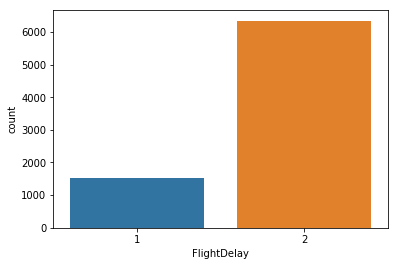

In [177]:
# Visualizations
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='FlightDelay',data=Final_train_delay)

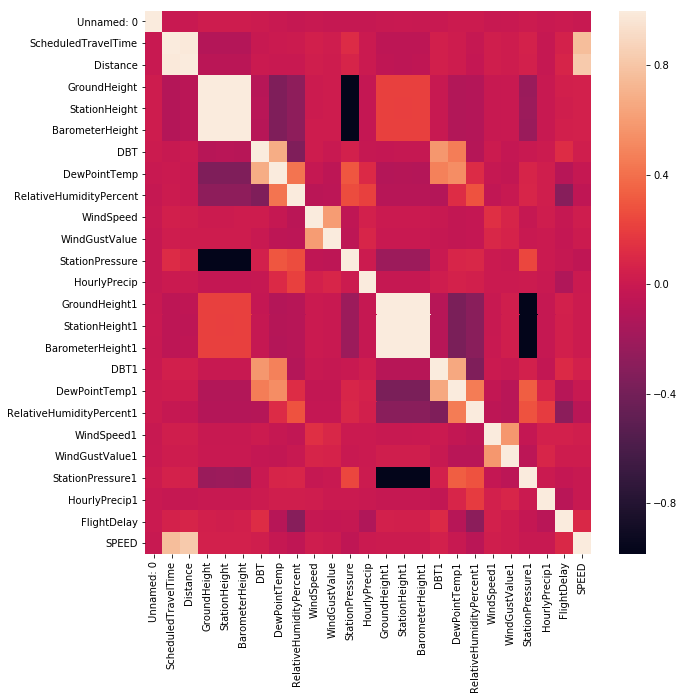

In [178]:
# heat map
plt.figure(figsize = (10,10))
sns.heatmap(Final_train_delay.corr())
plt.show()

In [19]:
from PIL import Image
Skyconditions_on_Flight_delays = Image.open("Capture.PNG")

In [ ]:
# Effect of sky conditions on Flight Delay.

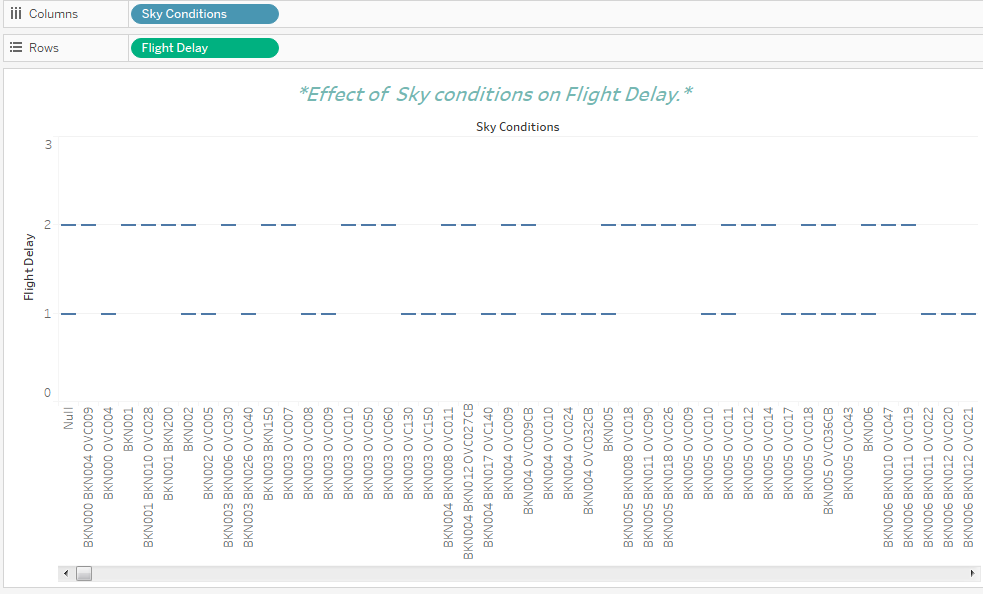

In [20]:
Skyconditions_on_Flight_delays

In [3]:
from PIL import Image

In [5]:
SkyConditions_and_Station_Pressure = Image.open("SkyConditions and Station Pressure.PNG")

In [ ]:
# Effect of sky condition and station pressure on Flight Delay.

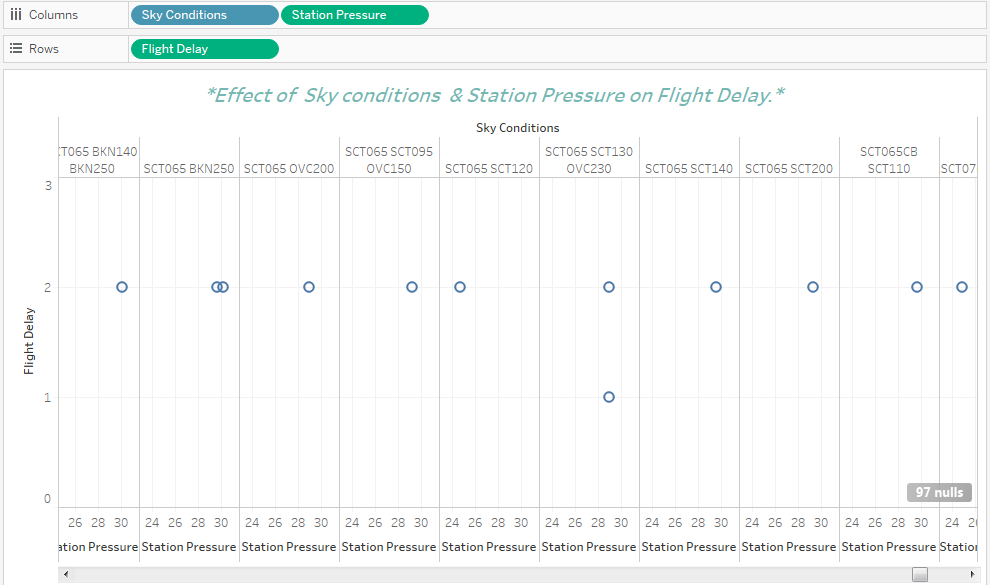

In [6]:
SkyConditions_and_Station_Pressure

In [11]:
Relative_Humi_percent_Origin = Image.open("Relative Humi percent & Origin.PNG")

In [ ]:
# Relative Humidity percent in each Origin Airport

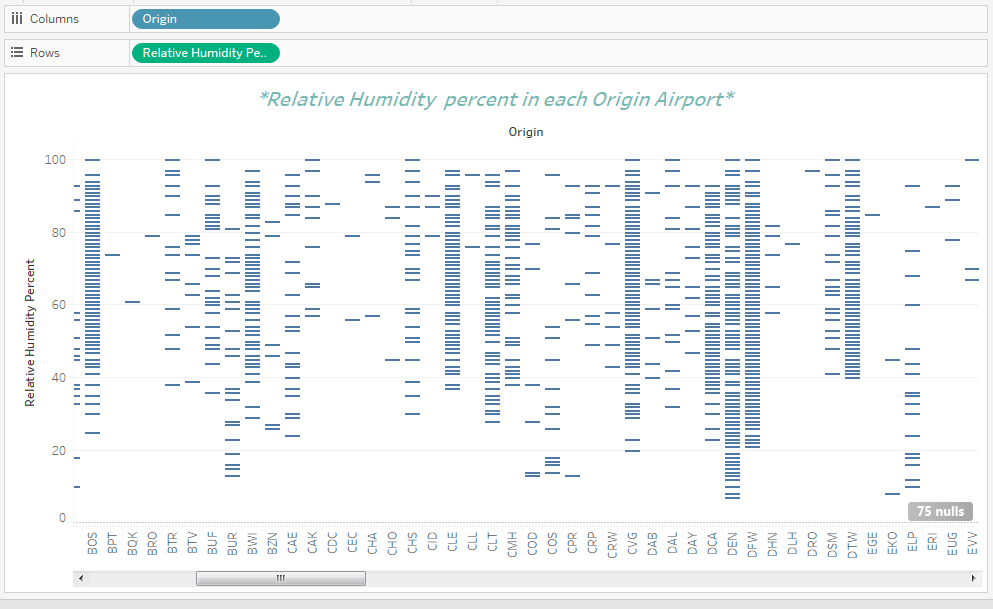

In [12]:
Relative_Humi_percent_Origin

In [14]:
Station_pressure_at_origin = Image.open("Station pressure at origin.PNG")

In [ ]:
# Station pressure in each Airport.

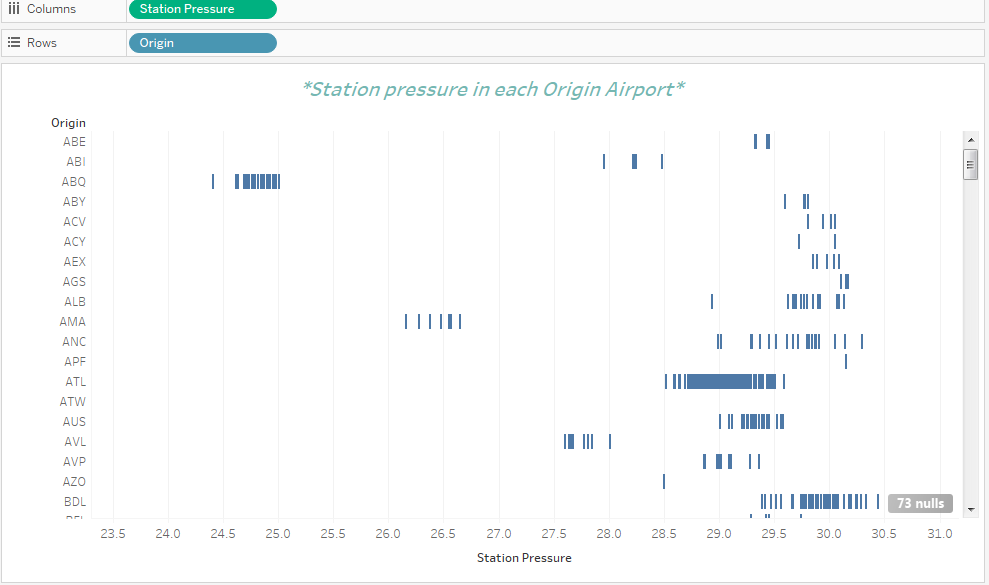

In [15]:
Station_pressure_at_origin

In [179]:
%matplotlib inline

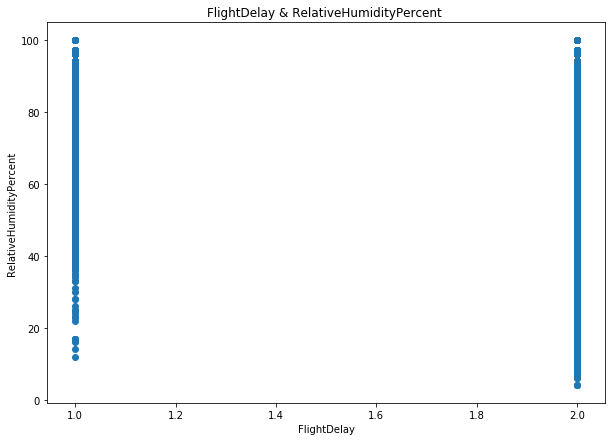

In [180]:
# checking the graph like ,   RelativeHumidityPercet effect on Flight_delay.
plt.figure(figsize = (10,7))
plt.scatter(x = Final_train_delay.FlightDelay,y = Final_train_delay.RelativeHumidityPercent)
plt.title('FlightDelay & RelativeHumidityPercent ')
plt.xlabel('FlightDelay')
plt.ylabel('RelativeHumidityPercent')
plt.show()

In [181]:
Final_train_delay.columns


Index(['Unnamed: 0', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'SkyConditions', 'Visibility', 'DBT', 'DewPointTemp',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip', 'GroundHeight1',
       'StationHeight1', 'BarometerHeight1', 'SkyConditions1', 'Visibility1',
       'DBT1', 'DewPointTemp1', 'RelativeHumidityPercent1', 'WindSpeed1',
       'WindDirection1', 'WindGustValue1', 'StationPressure1', 'HourlyPrecip1',
       'FlightDelay', 'SPEED'],
      dtype='object')

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


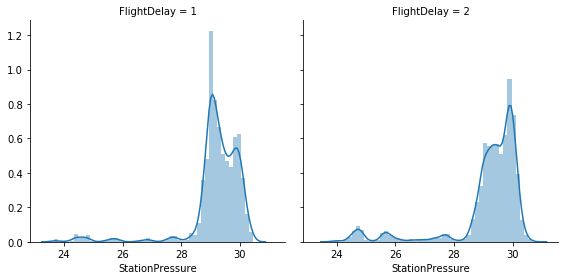

In [182]:
# Checking station pressure with flight delay
g = sns.FacetGrid(Final_train_delay,col='FlightDelay',size = 4)
g.map(sns.distplot,'StationPressure')
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


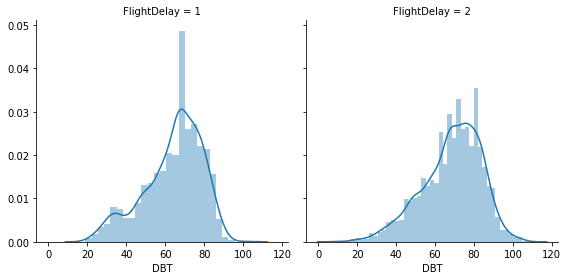

In [183]:
## Checking DBT with flight delay
g = sns.FacetGrid(Final_train_delay,col='FlightDelay',size = 4)
g.map(sns.distplot,'DBT')

plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


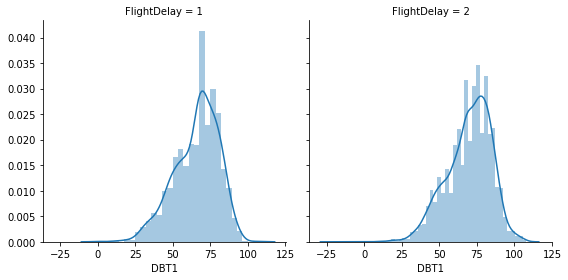

In [184]:
## Checking DBT1 with flight delay
g = sns.FacetGrid(Final_train_delay,col='FlightDelay',size = 4)
g.map(sns.distplot,'DBT1')

plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


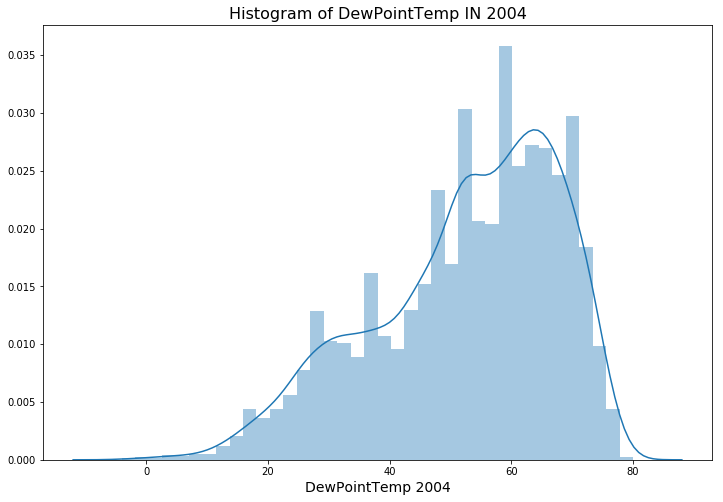

In [185]:
# How  DewPointTemp is distributed in 2004
plt.figure(figsize = (12,8))
b = sns.distplot(Final_train_delay.DewPointTemp)
b.set_title('Histogram of DewPointTemp IN 2004',fontsize = 16)
b.set_xlabel("DewPointTemp 2004",fontsize=14)

plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


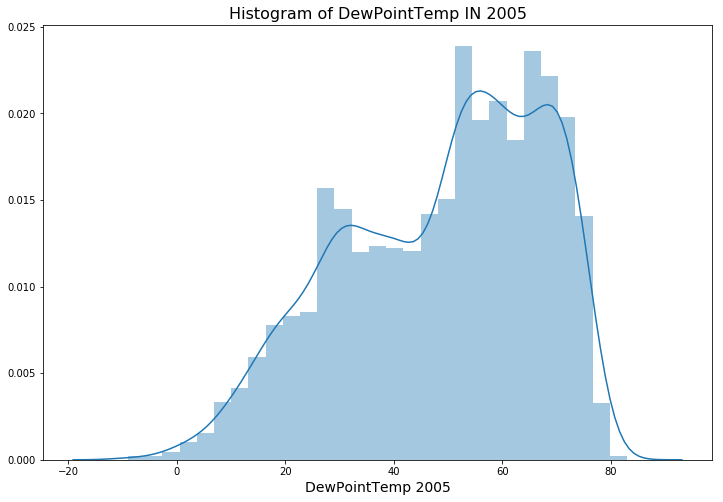

In [186]:
# How  DewPointTemp is distributed in 2005
plt.figure(figsize = (12,8))
b = sns.distplot(Final_test_delay.DewPointTemp)
b.set_title('Histogram of DewPointTemp IN 2005',fontsize = 16)
b.set_xlabel("DewPointTemp 2005",fontsize=14)

plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


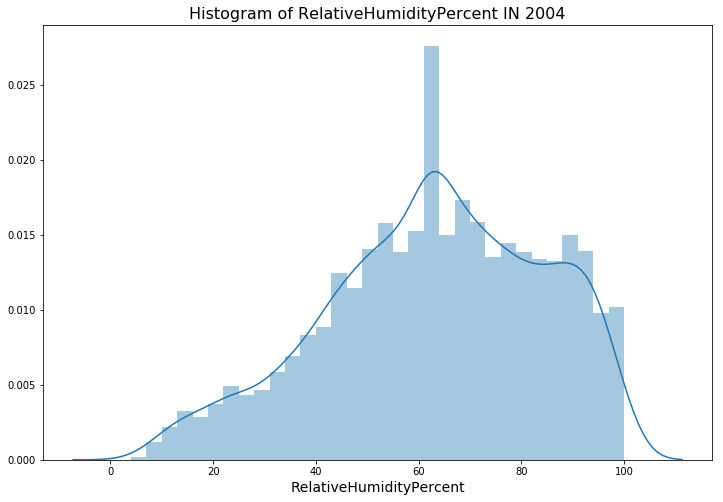

In [187]:
## How  RelativeHumidityPercent is distributed in 2004
plt.figure(figsize = (12,8))
b = sns.distplot(Final_train_delay.RelativeHumidityPercent)
b.set_title('Histogram of RelativeHumidityPercent IN 2004',fontsize = 16)
b.set_xlabel("RelativeHumidityPercent",fontsize=14)

plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


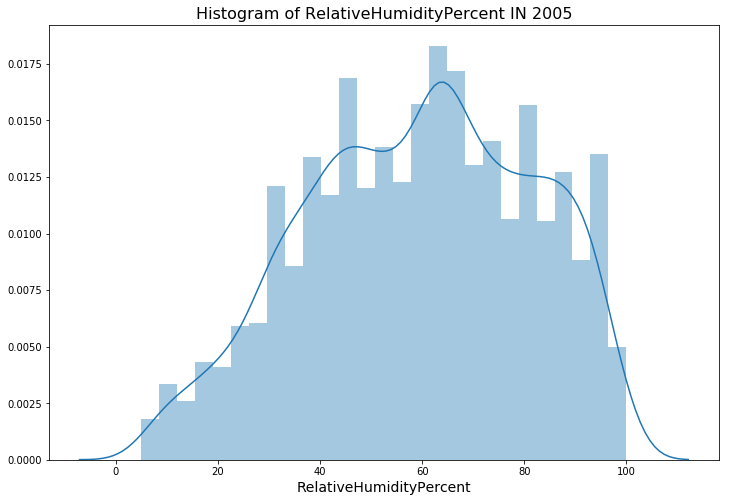

In [188]:
### How  RelativeHumidityPercent is distributed in 2005
plt.figure(figsize = (12,8))
b = sns.distplot(Final_test_delay.RelativeHumidityPercent)
b.set_title('Histogram of RelativeHumidityPercent IN 2005',fontsize = 16)
b.set_xlabel("RelativeHumidityPercent",fontsize=14)

plt.show()

Text(0.5,0,'RelativeHumidityPercent IN 2005')

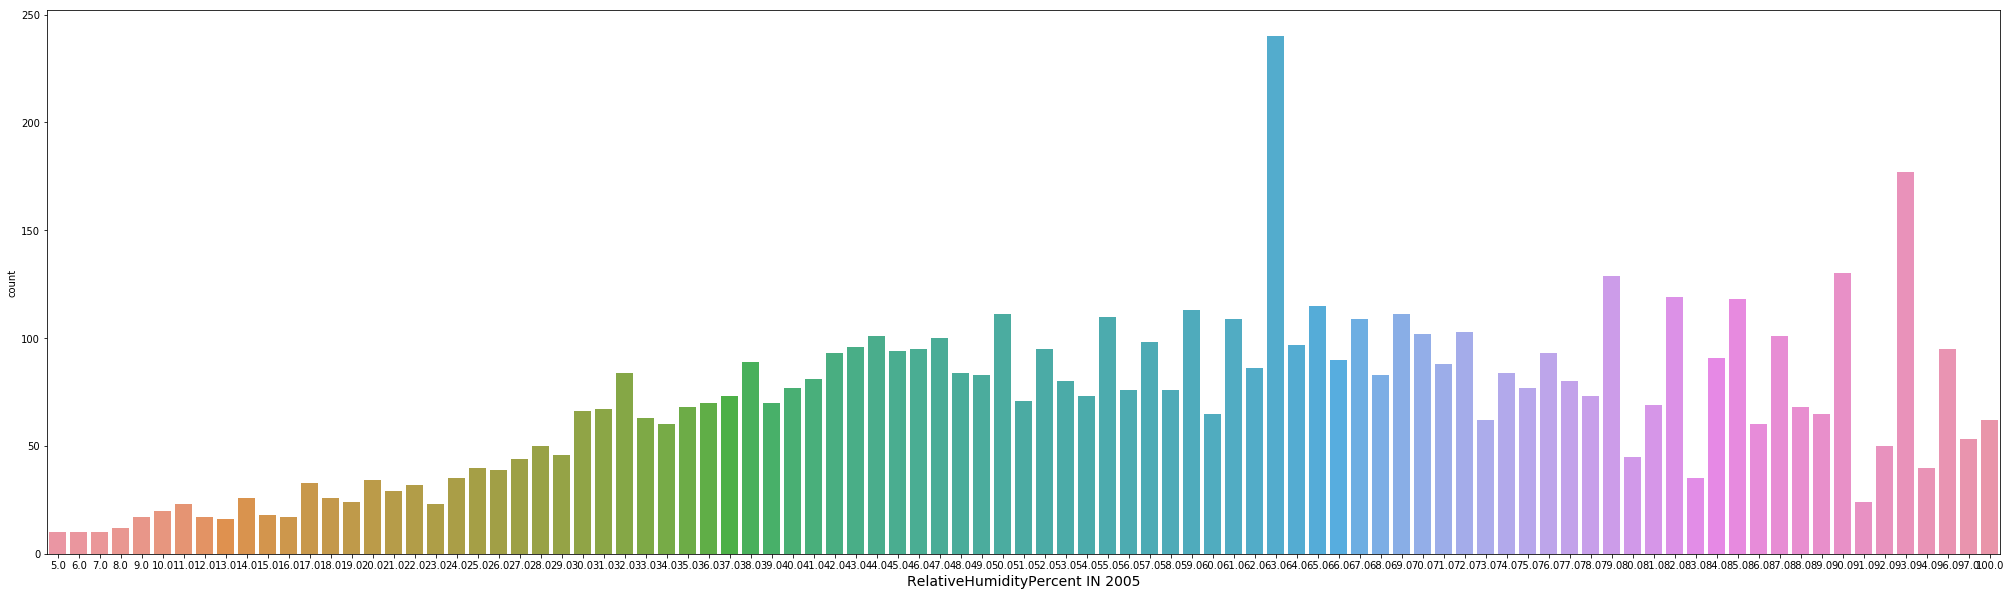

In [189]:
# checking counts of  RelativeHumidityPercent in 2005
plt.figure(figsize = (35,10))
freq_y1 = Final_test_delay.RelativeHumidityPercent.value_counts()
freq_y_df2 = pd.DataFrame(freq_y1.reset_index())
freq_y_df2.RelativeHumidityPercent.sum()
B = sns.countplot(x="RelativeHumidityPercent", data=Final_test_A)
B.set_xlabel("RelativeHumidityPercent IN 2005",fontsize=14)

In [190]:
#Applied label encoding to SKY conditions as we could see 3000 levels .
from sklearn.preprocessing import LabelEncoder
le_sky_train = LabelEncoder()
le_sky_test = LabelEncoder()
Final_train_delay['SkyConditions_encoded'] = le_sky_train.fit_transform(Final_train_delay.SkyConditions)

#Final_train_A['make_encoded'] = le_sky_test.fit_transform(df.make)

In [191]:
Final_train_delay['SkyConditions_encoded1'] = le_sky_train.fit_transform(Final_train_delay.SkyConditions1)

In [192]:
Final_test_delay['SkyConditions_encoded'] = le_sky_train.fit_transform(Final_test_delay.SkyConditions)

In [193]:
Final_test_delay['SkyConditions_encoded1'] = le_sky_train.fit_transform(Final_test_delay.SkyConditions1)

In [194]:
Final_test_delay['SkyConditions_encoded1'].head(10)

FlightNumber
DEN_XNA_62349      515
RIC_EWR_87213     1856
IAD_GSO_86576     2261
SAV_CVG_87264     1720
SBP_LAX_68158     1873
LGA_PWM_89349     1866
STL_LIT_83427     2488
ORD_STL_101923    1527
ONT_PHX_70779     1817
LGA_MIA_65916      767
Name: SkyConditions_encoded1, dtype: int32

In [195]:
Final_train_delay.columns

Index(['Unnamed: 0', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'SkyConditions', 'Visibility', 'DBT', 'DewPointTemp',
       'RelativeHumidityPercent', 'WindSpeed', 'WindDirection',
       'WindGustValue', 'StationPressure', 'HourlyPrecip', 'GroundHeight1',
       'StationHeight1', 'BarometerHeight1', 'SkyConditions1', 'Visibility1',
       'DBT1', 'DewPointTemp1', 'RelativeHumidityPercent1', 'WindSpeed1',
       'WindDirection1', 'WindGustValue1', 'StationPressure1', 'HourlyPrecip1',
       'FlightDelay', 'SPEED', 'SkyConditions_encoded',
       'SkyConditions_encoded1'],
      dtype='object')

In [ ]:
# dropped Origin , Destination and Sky conditions 
Final_train_delay=Final_train_delay.drop('Origin',axis=1)
Final_train_delay=Final_train_delay.drop('Destination',axis=1)
Final_train_delay=Final_train_delay.drop('SkyConditions',axis=1)
Final_train_delay=Final_train_delay.drop('SkyConditions1',axis=1)
Final_train_delay=Final_train_delay.drop('SkyConditions1',axis=1)

In [198]:

# dropped Origin , Destination and Sky conditions in test

Final_test_delay=Final_test_delay.drop('Origin',axis=1)
Final_test_delay=Final_test_delay.drop('Destination',axis=1)
Final_test_delay=Final_test_delay.drop('SkyConditions',axis=1)
Final_test_delay=Final_test_delay.drop('SkyConditions1',axis=1)

In [ ]:
#Dropped Unnamed column 
Final_train_delay =Final_train_delay.drop('Unnamed: 0',axis = 1) 

In [200]:
# replaced 10sm TO numbers 10 in Visibility column
Final_train_delay["Visibility"] = Final_train_delay.Visibility.str.replace('[SM]', '')
Final_test_delay["Visibility"] = Final_test_delay.Visibility.str.replace('[SM]', '')

In [201]:
Final_train_delay["Visibility1"] = Final_train_delay.Visibility.str.replace('[SM]', '')
Final_test_delay["Visibility1"] = Final_test_delay.Visibility.str.replace('[SM]', '')

In [202]:
Final_train_delay.T

,0,1,2,3,4,5,6,7,8,9,...,7846,7847,7848,7849,7850,7851,7852,7853,7854,7855
ScheduledTravelTime,114,114,62,93,76,62,107,63,120,156,...,85,80,352,165,66,145,179,75,104,168
Distance,563,554,226,508,334,268,551,250,597,1068,...,414,235,2475,998,270,861,946,239,546,1062
GroundHeight,19,802,49,721,871,882,559,222,636,559,...,977,655,29,25,971,118,25,306,810,117
StationHeight,30,805,55,769,838,883,596,210,630,596,...,980,674,22,30,1026,108,30,323,817,11
BarometerHeight,180,805,52,724,874,885,562,225,639,562,...,980,658,32,28,974,121,28,309,816,120
Visibility,10,6,7,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,9,10,6
DBT,63,53,69,90,68,72,80,58,74,79,...,63,83,70,72,89,80,48,85,67,74
DewPointTemp,40,50,61,66,58,49,59,52,68,62,...,54,65,57,59,71,72,26,60,52,73
RelativeHumidityPercent,43,89,76,45,70,44,49,81,82,56,...,73,55,64,64,55,76,42,43,63,97
WindSpeed,6,7,7,0,10,7,14,0,11,3,...,4,10,11,8,6,11,14,7,8,0


In [203]:
Final_test_delay.T

FlightNumber,DEN_XNA_62349,RIC_EWR_87213,IAD_GSO_86576,SAV_CVG_87264,SBP_LAX_68158,LGA_PWM_89349,STL_LIT_83427,ORD_STL_101923,ONT_PHX_70779,LGA_MIA_65916,...,MCO_BDL_97899,RDU_EWR_81506,GRB_DTW_82155,SEA_ANC_90012,LAX_OAK_93414,LAX_EWR_82392,ORD_BOS_71467,MCI_BWI_101601,SLC_COD_68517,MCI_ABQ_65005
ScheduledTravelTime,100,75,64,102,63,77,65,79,70,179,...,152,87,74,229,78,302,141,135,83,120
Distance,616,278,239,515,155,270,296,258,325,1097,...,1050,416,288,1449,337,2454,867,967,298,718
GroundHeight,5379,164,306,48,193,36,707,655,901,36,...,95,427,682,447,323,323,655,1005,4221,1005
StationHeight,5431,163,323,51,207,31,710,674,905,31,...,106,437,702,450,326,326,674,1025,4227,1025
BarometerHeight,5382,167,309,51,196,39,710,658,904,39,...,98,430,685,450,326,326,658,1008,4224,1008
Visibility,10,10,10,10,3,10,10,10,6,10,...,9,9,1.75,1.25,10,10,5,7,10,10
DBT,87,75,74,53,55,84,75,44,87,89,...,85,49,45,41,73,81,21,43,62,76
DewPointTemp,14,54,45,29,51,71,63,30,38,54,...,72,46,43,40,63,44,17,34,54,69
RelativeHumidityPercent,6,48,36,40,87,65,66,58,18,30,...,65,90,93,96,71,27,85,71,75,79
WindSpeed,6,4,8,9,3,7,9,6,7,14,...,11,3,11,0,13,9,6,9,5,3


In [204]:
#from imblearn.over_sampling import SMOTE

# Splitting  data in to train and Validation sets.

In [205]:
train_y = Final_train_delay["FlightDelay"]
Final_train_delay.drop("FlightDelay",axis=1, inplace=True)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Final_train_delay, train_y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5892, 29)
(1964, 29)
(5892,)
(1964,)


In [ ]:
# Converting  all numeric columns to float and  int .

In [207]:
X_train["Visibility"] = X_train["Visibility"].astype("float")
X_train["Visibility1"]= X_train["Visibility"].astype("float")
X_train["WindDirection"]= X_train["WindDirection"].astype("float")
X_train["WindDirection1"]= X_train["WindDirection1"].astype("float")
X_train["WindSpeed1"]= X_train["WindSpeed1"].astype("float")
X_train["WindSpeed"]= X_train["WindSpeed"].astype("float")

In [208]:
X_test["Visibility"] = X_test["Visibility"].astype("float")
X_test["Visibility1"]= X_test["Visibility"].astype("float")
X_test["WindDirection"]= X_test["WindDirection"].astype("float")
X_test["WindDirection1"]= X_test["WindDirection1"].astype("float")
X_test["WindSpeed1"]= X_test["WindSpeed1"].astype("float")
X_test["WindSpeed"]= X_test["WindSpeed"].astype("float")

In [209]:
# standardization

In [210]:
num_values1=X_train.select_dtypes(['float64','int64','int32']).columns

In [ ]:
# standardizing the features

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_values1])
X_train[num_values1]=scaler.transform(X_train[num_values1])
X_test[num_values1]=scaler.transform(X_test[num_values1])
Final_test_delay[num_values1]=scaler.transform(Final_test_delay[num_values1])

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  import sys


In [212]:
X_train.dtypes

ScheduledTravelTime         float64
Distance                    float64
GroundHeight                float64
StationHeight               float64
BarometerHeight             float64
Visibility                  float64
DBT                         float64
DewPointTemp                float64
RelativeHumidityPercent     float64
WindSpeed                   float64
WindDirection               float64
WindGustValue               float64
StationPressure             float64
HourlyPrecip                float64
GroundHeight1               float64
StationHeight1              float64
BarometerHeight1            float64
Visibility1                 float64
DBT1                        float64
DewPointTemp1               float64
RelativeHumidityPercent1    float64
WindSpeed1                  float64
WindDirection1              float64
WindGustValue1              float64
StationPressure1            float64
HourlyPrecip1               float64
SPEED                       float64
SkyConditions_encoded       

# Appling  Smoting as we could see the  Imbalance in target(Flight delay) feature.

In [214]:
from imblearn.over_sampling import SMOTE

In [215]:
sm = SMOTE(random_state = 42)

In [216]:
X_train_sm , y_train_sm = sm.fit_sample(X_train , y_train)

# logistic regression model

In [130]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
seed=12
logreg = LogisticRegression(C=1, random_state=12, class_weight='balanced')

In [217]:
score = logreg.fit(X_train_sm, y_train_sm)

In [219]:
y_log_pred_train = logreg.predict(X_train_sm)
ii = logreg.predict_proba(X_train_sm)
probs_log = ii[:,1]  #taking a column
probs_log[probs_log > 0.4] = 1  
probs_log[probs_log <= 0.4] = 2
y_log_pred_test = logreg.predict(X_test)
y_log_pred_train=logreg.predict(X_train_sm)
print(classification_report(y_train_sm,y_log_pred_train))
print(classification_report(y_test, y_log_pred_test))
print(accuracy_score(y_test, y_log_pred_test))

              precision    recall  f1-score   support

           1       0.73      0.73      0.73      4738
           2       0.73      0.74      0.73      4738

   micro avg       0.73      0.73      0.73      9476
   macro avg       0.73      0.73      0.73      9476
weighted avg       0.73      0.73      0.73      9476

              precision    recall  f1-score   support

           1       0.37      0.70      0.48       360
           2       0.92      0.73      0.81      1604

   micro avg       0.73      0.73      0.73      1964
   macro avg       0.64      0.72      0.65      1964
weighted avg       0.82      0.73      0.75      1964

0.7265784114052953


In [220]:
ii

array([[0.02726367, 1.        ],
       [0.35176237, 1.        ],
       [0.49232701, 1.        ],
       ...,
       [0.63232574, 2.        ],
       [0.89446978, 2.        ],
       [0.8010714 , 2.        ]])

# RandomForestClassifier

In [278]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=150,max_depth = 6,max_features=7)
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [280]:
#feat_importances = pd.Series(model.feature_importances_, index=X_train_sm.columns)
#feat_importances = feat_importances.sort_values(ascending=False)
#feat_importances.nlargest(20).plot(kind='barh')

In [281]:
#predicting on train and test data
y_rf_pred_test = model.predict(X_test)
y_rf_pred_train = model.predict(X_train_sm)
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
print(classification_report(y_train_sm, y_rf_pred_train))
print(classification_report(y_test, y_rf_pred_test))
print(accuracy_score(y_test, y_rf_pred_test))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82      4738
           2       0.83      0.80      0.81      4738

   micro avg       0.82      0.82      0.82      9476
   macro avg       0.82      0.82      0.82      9476
weighted avg       0.82      0.82      0.82      9476

              precision    recall  f1-score   support

           1       0.39      0.68      0.50       360
           2       0.91      0.76      0.83      1604

   micro avg       0.75      0.75      0.75      1964
   macro avg       0.65      0.72      0.67      1964
weighted avg       0.82      0.75      0.77      1964

0.7484725050916496


In [282]:
y_rf_pred_test

array([1, 1, 2, ..., 2, 2, 2], dtype=int64)

In [283]:
import os
os.getcwd()
#os.chdir('/nfsroot/data/home/2389B49/End_of_course')

'C:\\Users\\DELL\\Desktop\\R installation and Its Programs\\End_of_course\\Submissions'

In [284]:
Final_test_delay.head(5).T

FlightNumber,DEN_XNA_62349,RIC_EWR_87213,IAD_GSO_86576,SAV_CVG_87264,SBP_LAX_68158
ScheduledTravelTime,-0,-1,-1,-0,-1
Distance,-0,-1,-1,-0,-1
GroundHeight,4,-1,-0,-1,-1
StationHeight,4,-1,-0,-1,-1
BarometerHeight,4,-1,-0,-1,-1
Visibility,0,0,0,0,-2
DBT,1,0,0,-1,-1
DewPointTemp,-3,0,-1,-2,-0
RelativeHumidityPercent,-3,-1,-1,-1,1
WindSpeed,-0,-1,-0,0,-1


In [285]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\R installation and Its Programs\\End_of_course\\Submissions'

In [286]:
os.chdir("C:/Users/DELL/Desktop/R installation and Its Programs/End_of_course/Submissions")

In [287]:
test_pred2= model.predict(Final_test_delay)
sample = pd.read_csv('C:/Users/DELL/Desktop/R installation and Its Programs/End_of_course/flightdelay_samplesubmission-1550836789630.csv')
sub = pd.DataFrame()
sub['FlightNumber'] = sample.FlightNumber
sub['FlightDelayStatus'] = test_pred2
sub.to_csv('Rohan_random_forest.csv')

In [ ]:
X_train.dtypes

# XGBOOST

In [150]:
!pip install xgboost

In [334]:
import xgboost as xgb
from xgboost import XGBClassifier

model_xgb=XGBClassifier(n_estimators=100,random_state=1,learning_rate=0.02,max_depth = 7)
model_xgb.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [320]:
 #As smoted  data that is train is in array form , so converting the test to array(matrix format)
X_test = X_test.as_matrix()

In [321]:
print("Train accuracy is ",accuracy_score(y_train_sm,model_xgb.predict(X_train_sm)))
print("Test accuracy is",accuracy_score(y_test,model_xgb.predict(X_test)))

Train accuracy is  0.8632334318277755
Test accuracy is 0.7683299389002036


In [336]:
print(classification_report(y_train_sm,model_xgb.predict(X_train_sm)))
print(classification_report(y_test,model_xgb.predict(X_test)))

              precision    recall  f1-score   support

           1       0.88      0.91      0.89      4738
           2       0.90      0.87      0.89      4738

   micro avg       0.89      0.89      0.89      9476
   macro avg       0.89      0.89      0.89      9476
weighted avg       0.89      0.89      0.89      9476

              precision    recall  f1-score   support

           1       0.43      0.61      0.51       360
           2       0.90      0.82      0.86      1604

   micro avg       0.78      0.78      0.78      1964
   macro avg       0.67      0.72      0.68      1964
weighted avg       0.82      0.78      0.79      1964



In [302]:
print(accuracy_score(y_test, model_xgb.predict(X_test)))

0.7627291242362525
